(fir-filters)=
# FIR filters

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sdr

%config InlineBackend.print_figure_kwargs = {"facecolor" : "w"}
%matplotlib inline
# %matplotlib widget

sdr.plot.use_style()

## Create an FIR filter

The user creates an FIR filter with the {obj}`sdr.FIR` class by specifying the feedforward coefficients $h_i$.

Below is an square-root raised cosine FIR filter.

In [2]:
h = sdr.root_raised_cosine(0.5, 6, 10)
fir = sdr.FIR(h)

## Examine the impulse response, $h[n]$

The impulse response of the FIR filter is computed and returned from the {meth}`sdr.FIR.impulse_response()` method.
The impulse response $h[n]$ is the output of the filter when the input is an impulse $\delta[n]$.

For FIR filters, the impulse response is the same as the feedforward taps.

In [3]:
h = fir.impulse_response()
print(h)

[ 0.00095883 -0.00175012 -0.00423921 -0.0058825  -0.006151   -0.00474595
 -0.0017044   0.00254816  0.00721645  0.0112324   0.01342358  0.01273202
  0.00845058  0.0004368  -0.01073669 -0.02372977 -0.03650247 -0.04650654
 -0.05098525 -0.04734644 -0.03355896 -0.00851486  0.02769991  0.07367348
  0.12670446  0.18301321  0.23810898  0.28727058  0.32607991  0.35093841
  0.35949665  0.35093841  0.32607991  0.28727058  0.23810898  0.18301321
  0.12670446  0.07367348  0.02769991 -0.00851486 -0.03355896 -0.04734644
 -0.05098525 -0.04650654 -0.03650247 -0.02372977 -0.01073669  0.0004368
  0.00845058  0.01273202  0.01342358  0.0112324   0.00721645  0.00254816
 -0.0017044  -0.00474595 -0.006151   -0.0058825  -0.00423921 -0.00175012
  0.00095883]


The impulse response is conveniently plotted using the {obj}`sdr.plot.impulse_response()` function.

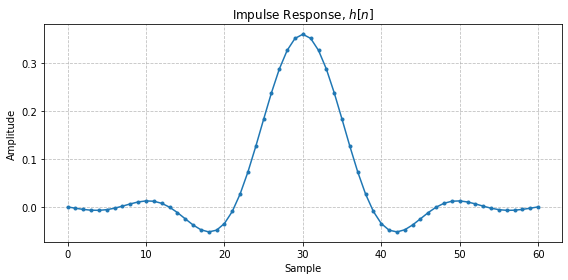

In [4]:
plt.figure()
sdr.plot.impulse_response(fir, marker=".")
plt.show()

## Examine the step response, $s[n]$

The step response of the FIR filter is computed and returned from the {meth}`sdr.FIR.step_response()` method.
The step response $s[n]$ is the output of the filter when the input is a unit step $u[n]$.

In [5]:
s = fir.step_response()
print(s)

[ 0.00095883 -0.00175012 -0.00423921 -0.0058825  -0.006151   -0.00474595
 -0.0017044   0.00254816  0.00721645  0.0112324   0.01342358  0.01273202
  0.00845058  0.0004368  -0.01073669 -0.02372977 -0.03650247 -0.04650654
 -0.05098525 -0.04734644 -0.03355896 -0.00851486  0.02769991  0.07367348
  0.12670446  0.18301321  0.23810898  0.28727058  0.32607991  0.35093841
  0.35949665  0.35093841  0.32607991  0.28727058  0.23810898  0.18301321
  0.12670446  0.07367348  0.02769991 -0.00851486 -0.03355896 -0.04734644
 -0.05098525 -0.04650654 -0.03650247 -0.02372977 -0.01073669  0.0004368
  0.00845058  0.01273202  0.01342358  0.0112324   0.00721645  0.00254816
 -0.0017044  -0.00474595 -0.006151   -0.0058825  -0.00423921 -0.00175012
  0.00095883]


The step response is conveniently plotted using the {obj}`sdr.plot.step_response()` function.

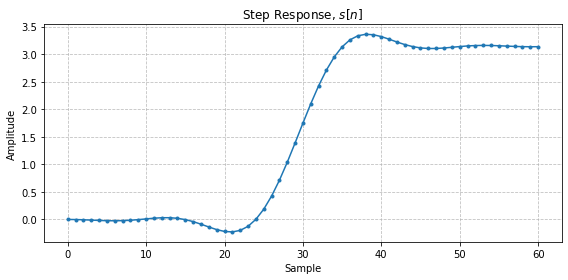

In [6]:
plt.figure()
sdr.plot.step_response(fir, marker=".")
plt.show()

## Examine the frequency response, $H(\omega)$

The frequency response is the transfer function $H(z)$ evaluated at the complex exponential
$e^{j \omega}$, where $\omega = 2 \pi f / f_s$.

The two-sided frequency response is conveniently plotted using the {obj}`sdr.plot.magnitude_response()` function.

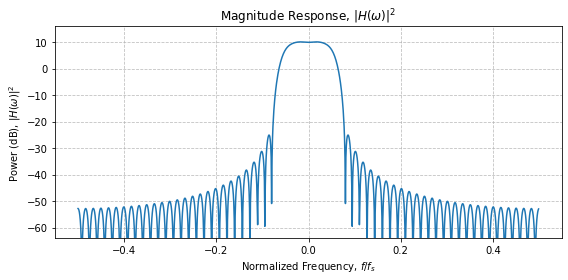

In [7]:
plt.figure()
sdr.plot.magnitude_response(fir)
plt.show()

The one-sided frequency response, with logarithmic scale, can be plotted using the `x_axis="log"` keyword argument.

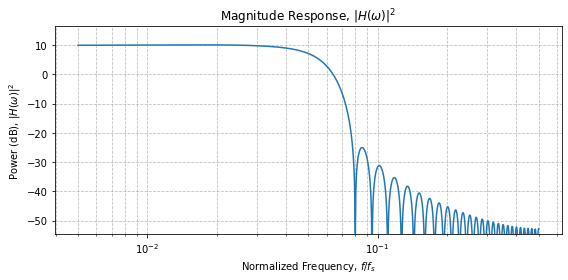

In [8]:
plt.figure()
sdr.plot.magnitude_response(fir, x_axis="log", decades=2)
plt.show()

## Examine the group delay, $\tau_g(\omega)$

The group delay $\tau_g(\omega)$ is the time shift of the envelope of a signal passed through the filter
as a function of its frequency $\omega$.

The group delay is conveniently plotted using the {obj}`sdr.plot.group_delay()` function.

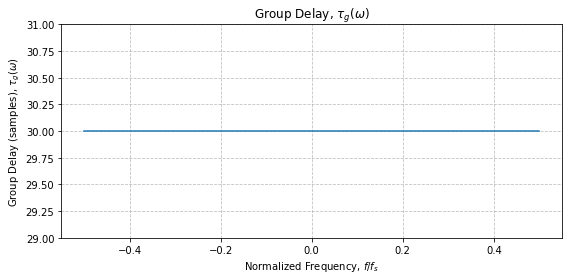

In [9]:
plt.figure()
sdr.plot.group_delay(fir)
plt.ylim(29, 31)
plt.show()

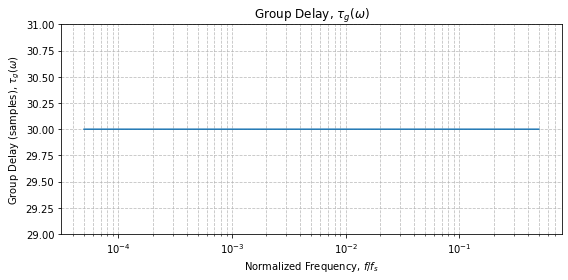

In [10]:
plt.figure()
sdr.plot.group_delay(fir, x_axis="log")
plt.ylim(29, 31)
plt.show()

## Fully analyze a FIR filter

The user can easily analyze the perform of a given IIR filter using the {obj}`sdr.plot.filter()` function.

Here is an FIR filter with one real zero and 8 complex poles.

In [11]:
h = sdr.root_raised_cosine(0.1, 12, 10)
fir = sdr.FIR(h)

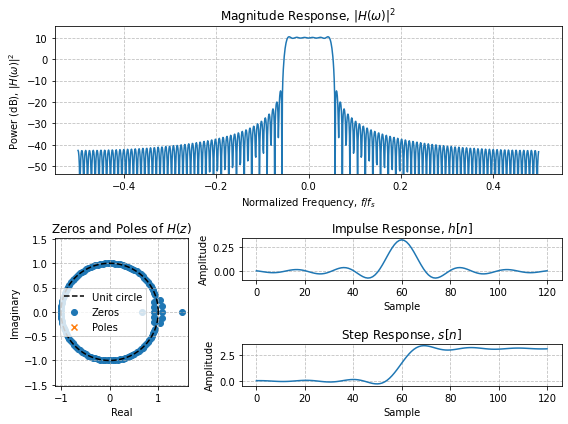

In [12]:
plt.figure(figsize=(8, 6))
sdr.plot.filter(fir)
plt.show()